In [406]:
from aiida import load_profile

profile = load_profile()
import numpy as np
from aiida_kkr.workflows import combine_imps_wc
from aiida.orm import load_node, Dict, groups
# load classes and functions
from aiida.orm import CifData, Code, Dict, load_node, StructureData 
from aiida.orm import (Group, load_group, load_node, load_code, groups,groups,
                      WorkChainNode)
from aiida.engine import submit, exceptions
from aiida.common.exceptions import NotExistent
from aiida_kkr.workflows import kkr_imp_sub_wc, kkr_imp_dos, kkr_imp_wc, kkr_startpot_wc, combine_imps_wc
import numpy as np
from aiida_kkr.calculations import KkrimpCalculation, VoronoiCalculation
import matplotlib.pyplot as plt
from aiida_kkr.tools.common_workfunctions import get_username
import matplotlib.gridspec as gridspec
from aiida_kkr.tools import plot_kkr

In [407]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mp

In [408]:
grp_CPA_Calcu = load_group('CPA_Calculation_Jij_interactions')
grp_CPA_Calcu_nodes = list(grp_CPA_Calcu.nodes)

In [409]:
## All the CPA calculation uuid collection
grp_CPA_Calcu = load_group('CPA_Calculation_Jij_interactions') #'5f660056-4b5e-483b-b753-773807baeeb2' -> 'CPA_Calculation_Jij_interactions'
# reserve the following nodes

# ++++++++++++ Cr:V:Bi2Te3_CPA conc: 0.05 substutution of Bi ++++++++++++++++++++

#calc_Jij_z = load_node('09088dfe-0be7-4491-997b-c86cbf69e5ee')
#calc_Jij_y = load_node('9c1b3f1c-c959-42b3-8287-d85c4006c755')
#calc_Jij_x = load_node('c5c57680-0a94-4f67-8295-075c347d0dcd')
#
## ++++++++++++ Cr:Cr:Bi2Te3_CPA conc: 0.05 substutution of Bi ++++++++++++++++++++
#
#calc_Jij_z = load_node('937dc6a8-32b9-4beb-8180-502b1aad8a4e')
#calc_Jij_y = load_node('927de0d7-76b2-4954-a15b-6e020e435cf0')
#calc_Jij_x = load_node('2eb52a52-5d83-46d3-adcd-1a38f354fe9b')
#
## ++++++++++++ Cr:Mn:Bi2Te3_CPA conc: 0.05 substutution of Bi ++++++++++++++++++++
#
#calc_Jij_z = load_node('b77c1aab-954c-41b2-9938-f6fb3b140c51')
#calc_Jij_y = load_node('dbee73ed-4257-4d95-8f0c-a7e1df1e6887')
#calc_Jij_x = load_node('818210bf-f82a-48f9-af82-50f465b1b119')
#
## ++++++++++++ Cr:Mo:Bi2Te3_CPA conc: 0.05 substutution of Bi ++++++++++++++++++++
#
#calc_Jij_z = load_node('0f63ba75-642b-49ca-a394-4d49f2ff8920')
#calc_Jij_y = load_node('266ee8e1-2794-42ec-8c43-96125eea6739')
#calc_Jij_x = load_node('0105d154-3f8c-4eb8-ad0b-d404d48f70bf')
#
## ++++++++++++ V:V:Bi2Te3_CPA conc: 0.05 substutution of Bi ++++++++++++++++++++
#
#calc_Jij_z = load_node('2bd0b0b1-77ab-47c9-afc3-7fa48589ff1d')
#calc_Jij_y = load_node('54cda62c-2995-4537-8aee-0b08f6a2afa3')
#calc_Jij_x = load_node('a6429605-bc4f-48e5-95e4-107e308e39e6')
#
## ++++++++++++ V:Cr:Bi2Te3_CPA conc: 0.05 substutution of Bi ++++++++++++++++++++
#
#calc_Jij_z = load_node('897e9f03-fe47-4405-a308-5fe60d595383')
#calc_Jij_y = load_node('e5acc34f-6111-43eb-ab05-d68daf0a5710')
#calc_Jij_x = load_node('39ee222d-5b8c-45ce-97bc-2306291a9717')
#
## ++++++++++++ V:Mn:Bi2Te3_CPA conc: 0.05 substutution of Bi ++++++++++++++++++++
#
#calc_Jij_z = load_node('bc72525c-eaf5-48d5-b626-978a8690229e')
#calc_Jij_y = load_node('79c305f5-d86b-464a-9ca3-76af0d81e335')
#calc_Jij_x = load_node('79371273-ac6b-4cfc-88aa-447e6aba002')
#
## ++++++++++++ V:Mo:Bi2Te3_CPA conc: 0.05 substutution of Bi ++++++++++++++++++++
#
#calc_Jij_z = load_node('fac220a3-0861-435e-a471-1cacca800a21')
#calc_Jij_y = load_node('ccfe748e-1858-4c15-8a7c-08071169719a')
#calc_Jij_x = load_node('fef2a28a-afa3-4919-8f3b-738ddaf5be02')
#
## ++++++++++++ Mn:V:Bi2Te3_CPA conc: 0.05 substutution of Bi ++++++++++++++++++++
#
#calc_Jij_z = load_node('ecb3c91c-8389-4199-80a8-126a2b12aa93')
#calc_Jij_y = load_node('8cb7bd4f-3f11-41a3-8769-1561111e7b16')
#calc_Jij_x = load_node('60e9c409-d2e6-4cf8-afa5-45d5f1dd05be')
#
## ++++++++++++ Mn:Cr:Bi2Te3_CPA conc: 0.05 substutution of Bi ++++++++++++++++++++
#
#calc_Jij_z = load_node('479f395a-9e86-443a-9288-c050ecb39293')
#calc_Jij_y = load_node('66c833a5-5e9f-414e-b1f6-90655aea21b4')
#calc_Jij_x = load_node('5c38c449-f8f4-4bbe-b87d-8d1ee7800bda')
#
## ++++++++++++ Mn:Mn:Bi2Te3_CPA conc: 0.05 substutution of Bi ++++++++++++++++++++
#
#calc_Jij_z = load_node('c4e0b2fd-4be2-4e2a-8931-ff66624b8185')
#calc_Jij_y = load_node('da09923d-fb84-4bfc-a227-30637aef09ff')
#calc_Jij_x = load_node('6e770164-a21a-48a2-8943-4a3a9e0ce76e')
#
## ++++++++++++ Mn:Mo:Bi2Te3_CPA conc: 0.05 substutution of Bi ++++++++++++++++++++
#
#calc_Jij_z = load_node('a454167a-451b-4d4b-b8ba-2b332f134486')
#calc_Jij_y = load_node('f1d9f55b-376e-4f72-a591-df4407bda286')
#calc_Jij_x = load_node('ac595bab-ed4d-4318-8fa0-e6545cdfab78')
#
## ++++++++++++ Mo:V:Bi2Te3_CPA conc: 0.05 substutution of Bi ++++++++++++++++++++
#
#calc_Jij_z = load_node('6a565c6d-dc36-4848-9204-8c2c693456b1')
#calc_Jij_y = load_node('82864179-bebd-4495-af59-cfe56ad73a21')
#calc_Jij_x = load_node('df2c820a-d0a4-4b10-9d9f-4e353e21978c')
#
## ++++++++++++ Mo:Cr:Bi2Te3_CPA conc: 0.05 substutution of Bi ++++++++++++++++++++
#
#calc_Jij_z = load_node('51aa552f-eb88-4f7c-b4e3-7e55d4d2d07f')
#calc_Jij_y = load_node('7fd9c526-6714-40ca-8ee3-45e6073cec66')
#calc_Jij_x = load_node('49aa773e-d35c-4db2-a600-03187ff9b8a1')
#
## ++++++++++++ Mo:Mn:Bi2Te3_CPA conc: 0.05 substutution of Bi ++++++++++++++++++++
#
#calc_Jij_z = load_node('d47d543a-fb0c-4ba8-b6c4-82e32cf46b36')
#calc_Jij_y = load_node('df2d56a6-36d0-46fe-bdfa-724d82622c57')
#calc_Jij_x = load_node('ca272608-d1b7-47f6-8fb5-7cee891f5ac9')
#
## ++++++++++++ Mo:Mo:Bi2Te3_CPA conc: 0.05 substutution of Bi ++++++++++++++++++++
#
#calc_Jij_z = load_node('2484a105-1315-4020-880f-e7896b496f8b')
#calc_Jij_y = load_node('32645143-5064-4589-b327-43bdab372fe9')
#calc_Jij_x = load_node('9db659c9-5f83-4b57-813b-ae6adfe46153')

In [389]:
with open('./V_V_PosAndJijs.npy', 'rb') as f:
    V_V_pos = np.load(f)
    V_V_jijs = np.load(f)
    
with open('./V_Cr_PosToJijs_05_vs_05.npy', 'rb') as f:
    V_Cr_pos = np.load(f)
    V_Cr_jijs = np.load(f)

with open('./V_Mn_PosToJijs_05_vs_05.npy', 'rb') as f:
    V_Mn_pos = np.load(f)
    V_Mn_jijs = np.load(f)
    
with open('./V_Mo_PosToJijs_05_vs_05.npy', 'rb') as f:
    V_Mo_pos = np.load(f)
    V_Mo_jijs = np.load(f)

    
## Plot for Cr --------------
with open('./Cr_V_PosToJijs_05_vs_05.npy', 'rb') as f:
    Cr_V_pos = np.load(f)
    Cr_V_jijs = np.load(f)
    
with open('./Cr_Cr_PosAndJijs.npy', 'rb') as f:
    Cr_Cr_pos = np.load(f)
    Cr_Cr_jijs = np.load(f)
    
with open('./Cr_Mn_PosToJijs_05_vs_05.npy', 'rb') as f:
    Cr_Mn_pos = np.load(f)
    Cr_Mn_jijs = np.load(f)
    
with open('./Cr_Mo_PosToJijs_05_vs_05.npy', 'rb') as f:
    Cr_Mo_pos = np.load(f)
    Cr_Mo_jijs = np.load(f)
    
    
## ## Plot for Mn --------------
with open('./Mn_V_PosToJijs_05_vs_05.npy', 'rb') as f:
    Mn_V_pos = np.load(f)
    Mn_V_jijs = np.load(f)
    
with open('./Mn_Cr_PosToJijs_05_vs_05.npy', 'rb') as f:
    Mn_Cr_pos = np.load(f)
    Mn_Cr_jijs = np.load(f)
    
with open('./Mn_Mn_PosAndJijs.npy', 'rb') as f:
    Mn_Mn_pos = np.load(f)
    Mn_Mn_jijs = np.load(f)
    
with open('./Mn_Mo_PosToJijs_05_vs_05.npy', 'rb') as f:
    Mn_Mo_pos = np.load(f)
    Mn_Mo_jijs = np.load(f)

## Plot for MoMo-------------
with open('./Mo_V_PosToJijs_05_vs_05.npy', 'rb') as f:
    Mo_V_pos = np.load(f)
    Mo_V_jijs = np.load(f)
    
with open('./Mo_Mo_PosAndJijs.npy', 'rb') as f:
    Mo_Mo_pos = np.load(f)
    Mo_Mo_jijs = np.load(f)
with open('./Mo_Cr_PosToJijs_05_vs_05.npy', 'rb') as f:
    Mo_Mn_pos = np.load(f)
    Mo_Mn_jijs = np.load(f)
    
with open('./Mo_Mn_PosToJijs_05_vs_05.npy', 'rb') as f:
    Mo_Cr_pos = np.load(f)
    Mo_Cr_jijs = np.load(f)

In [390]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 17}
plt.rc('font',**font)

legnd_prop = {'weight' : 'bold'}

In [391]:
Mo_Cr_pos

array([[ -2.19148158,  -3.79575745,   0.        ],
       [ -4.38296317,   0.        ,   0.        ],
       [  2.19148158,   3.79575745,   0.        ],
       ...,
       [ 13.1488895 ,   5.06100994,  16.25973982],
       [  2.19148158, -13.9177773 ,  16.25973982],
       [-10.95740792,   8.85676737,  16.25973982]])

shape of d and shape of jijs are equivalent
shape of d and shape of jijs are equivalent
shape of d and shape of jijs are equivalent
shape of d and shape of jijs are equivalent
shape of d and shape of jijs are equivalent
shape of d and shape of jijs are equivalent
shape of d and shape of jijs are equivalent
shape of d and shape of jijs are equivalent
shape of d and shape of jijs are equivalent
shape of d and shape of jijs are equivalent
shape of d and shape of jijs are equivalent
shape of d and shape of jijs are equivalent
shape of d and shape of jijs are equivalent
shape of d and shape of jijs are equivalent
shape of d and shape of jijs are equivalent
shape of d and shape of jijs are equivalent


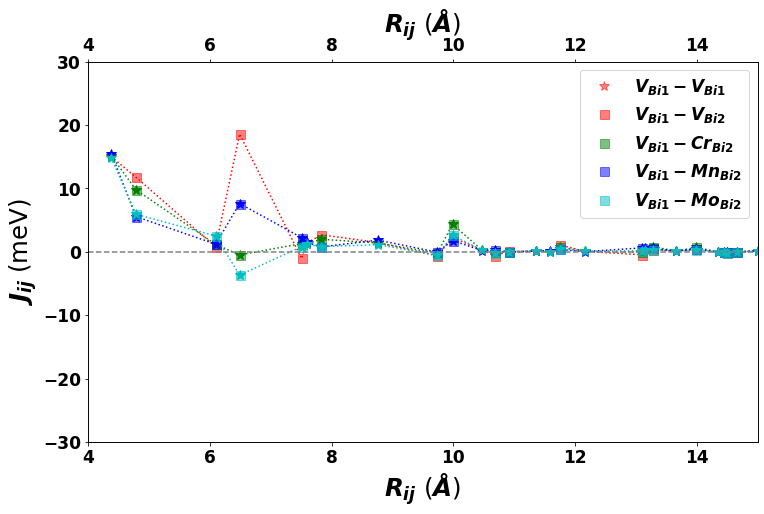

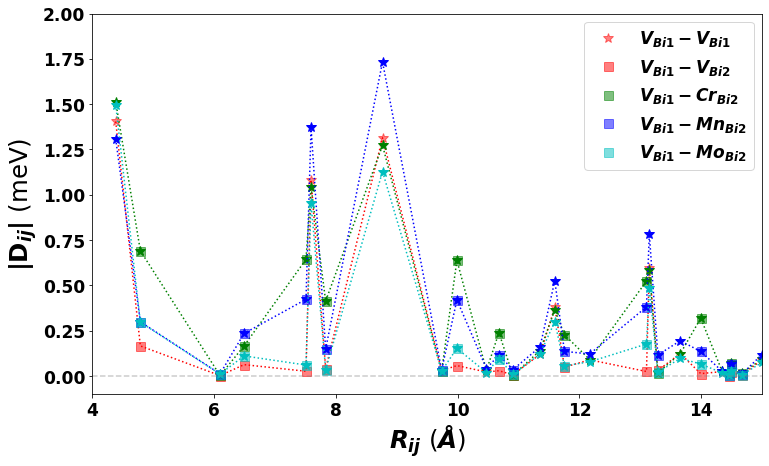

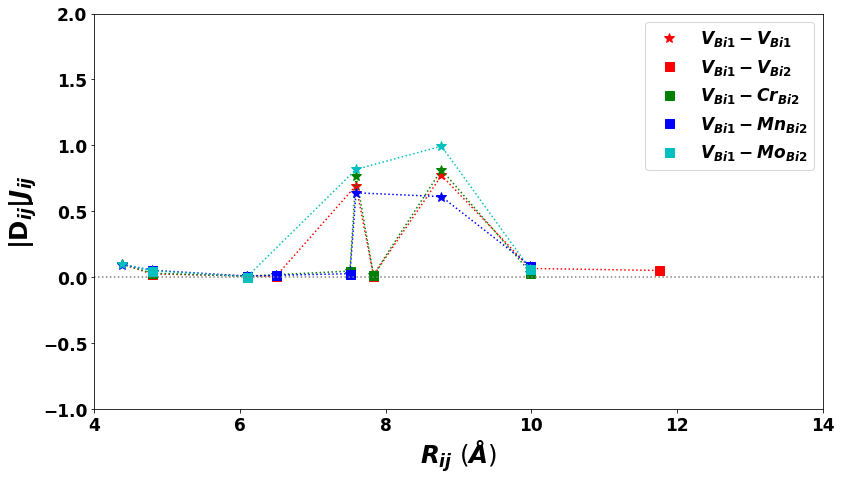

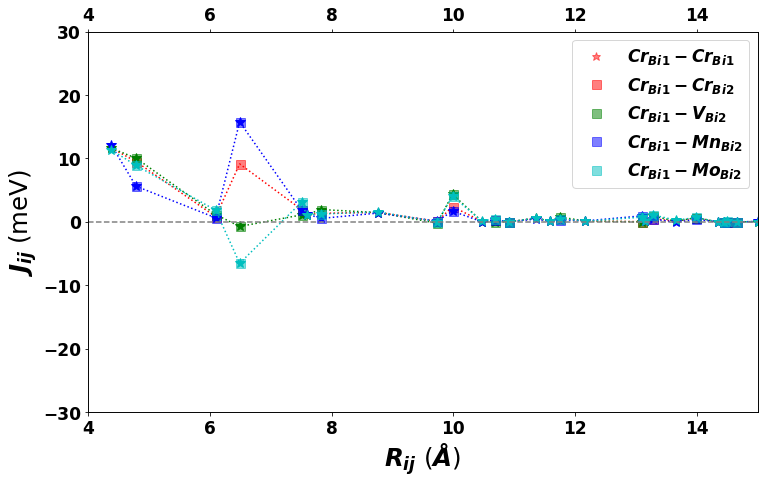

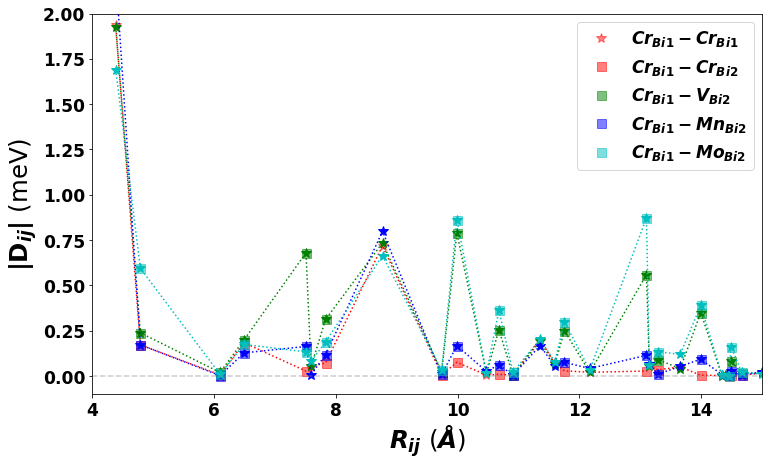

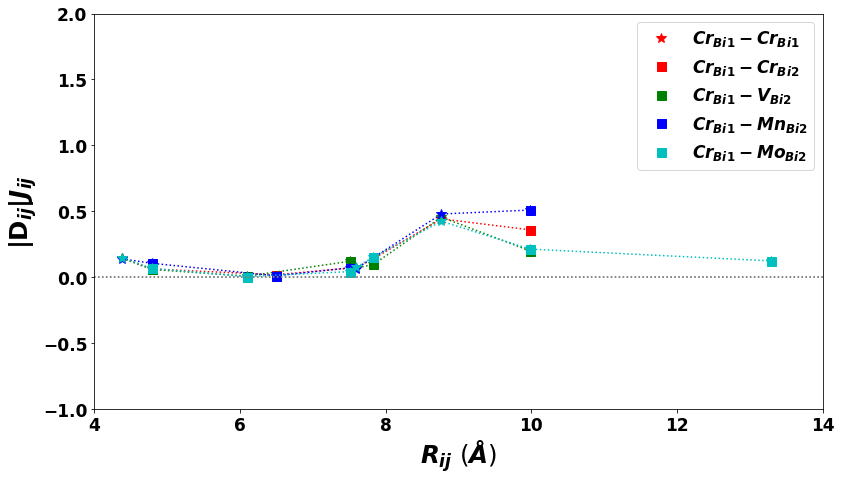

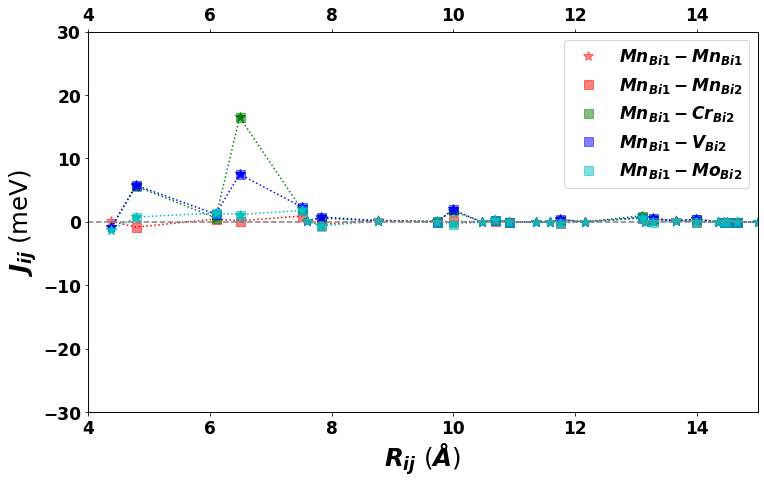

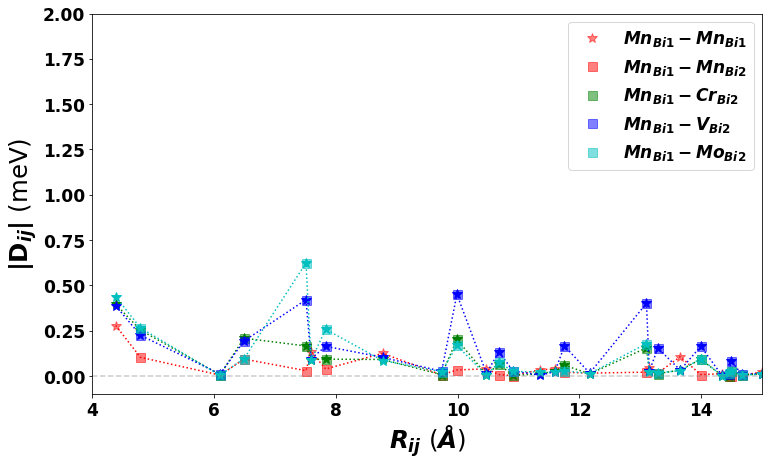

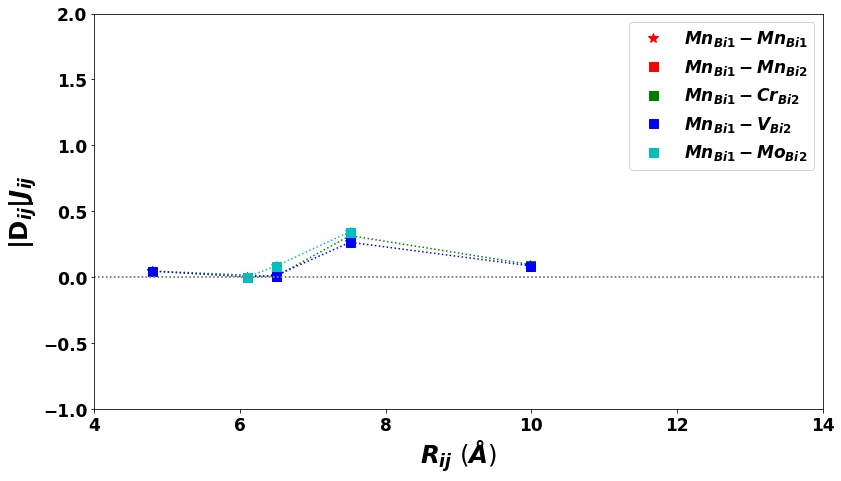

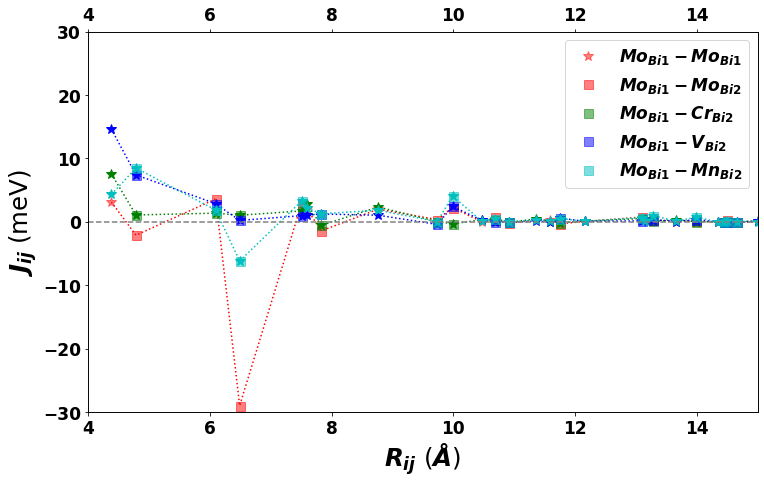

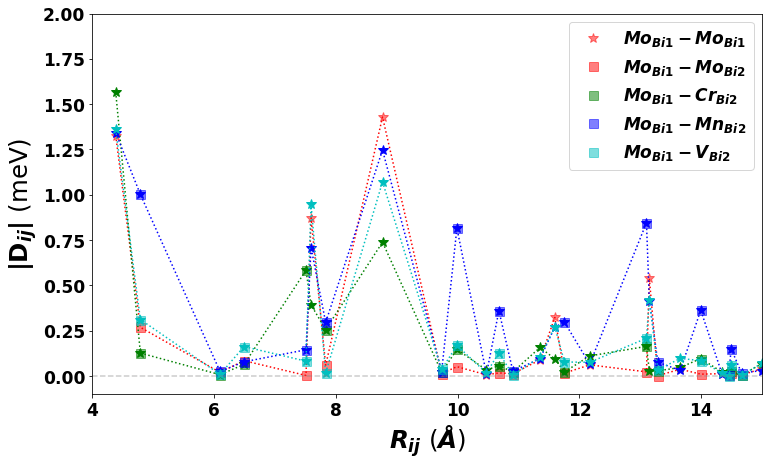

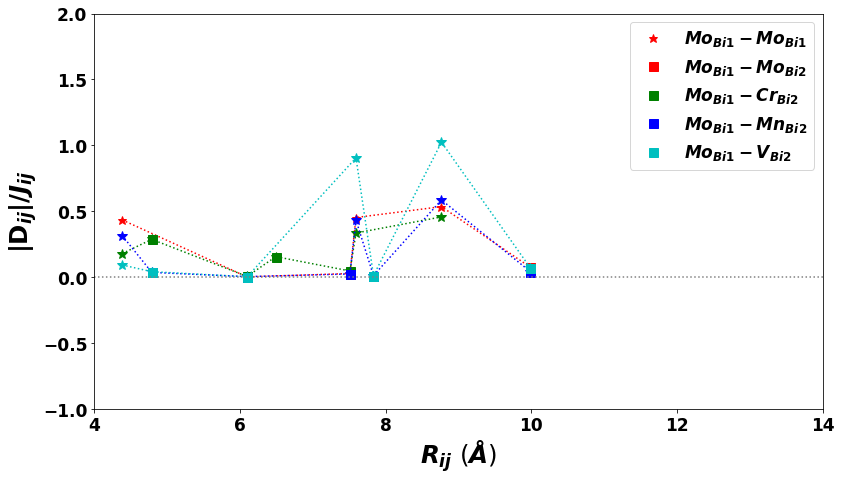

In [392]:
## This is the original plot and the next part is
## Just copy of this part
#mp.rcParams['text.usetex'] = True
#plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
#plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True
#plt.rcParams['axes.titlepad'] = 0#12*2
#plt.rcParams['axes.labelpad'] = 0#12*2
"""Jij 18 rows.
A typical Mo_Mo_jijs includes 18 columns

i, j, da, db, dc, Jij (meV) [, Dij vector (x, y, z in meV), full Jij tensor (xx, xy, xz, yx, yy, yz, zx, zy, zz in meV)]

"""

# Using the thresshold value of jij to filter Dij/Jij
def Filter_DbyJ(r, d, jijs, ratio_with_thrshold_jij=True, threshold_jij=1):
    if np.shape(d)[0] == np.shape(jijs)[0]:
        print('shape of d and shape of jijs are equivalent')
    else:
        print('not equivalent')
    if ratio_with_thrshold_jij : 
        indices = jijs[:,5]>=threshold_jij
        r = r[indices]
        d = d[indices]
        jijs = jijs[indices,:]
        global ylim_ratio 
        ylim_ratio = (-1,2.0)
        
        return r, d, jijs
    else:
        return r, d, jijs
    
def filtering_dis(dis, jijs):
    "To remove the data(jij) for the same distances"
    dis = np.round(dis,decimals=3)
    filtered_dis = list(set(dis))
    indices = []
    
    for ind, d in enumerate(dis):
        if d in filtered_dis:
            indices.append(ind)
            filtered_dis.remove(d)
    return dis[indices], jijs[indices]
    
# all_plots_together creates subplots in one figure that helps in comparison
all_plots_together = False # All the plots in one figure in one figure as subplots
ratio_with_thrshold_jij = True
mask_limit = 20
xlim = (4,15)
ylim_J = (-30,30)
ylim_abs_D = (-0.1, 2)
ylim_ratio = (0,25)
xlim_ratio = (4,14)
figure_size = (12,7)
twiny_= True

if all_plots_together:
    plt.figure(figsize=(30,25))

    
legend_fontsize = 'small'
#  Plot  +++++++++++++++++++++ V vs (V,Cr,Mn,Mo) ++++++++++++++++++++++++++++++++++

 # for jij vs. Rij'
#plt.title('V-(V,Cr,Mn,Mo) jij vs. Rij', fontsize='x-large')

if all_plots_together: # for jij vs. Rij'
    plt.subplot(4,3,1)
else:
    plt.figure(figsize=figure_size)
    
#r0 = np.sqrt(np.sum(pos0**2, axis=1))
#plt.plot(r0, jijs0[:,5], 'kd', ms=15, label='smaller k-mesh')

col = 'r'
r_V_V = np.sqrt(np.sum(V_V_pos**2, axis=1))
r_V_V, V_V_jijs = filtering_dis(r_V_V, V_V_jijs)
plt.plot(r_V_V, V_V_jijs[:,5], ':', color='r')
plt.plot(r_V_V[V_V_jijs[:,1]==10], V_V_jijs[V_V_jijs[:,1]==10][:,5], '*', ms=10, alpha=0.5, label='$V_{Bi1}-V_{Bi1}$', color=col)
plt.plot(r_V_V[V_V_jijs[:,1]==12], V_V_jijs[V_V_jijs[:,1]==12][:,5], 's', ms=9, alpha=0.5, label='$V_{Bi1}-V_{Bi2}$', color=col)

col ='g'

r_V_Cr = np.sqrt(np.sum(V_Cr_pos**2, axis=1))
r_V_Cr, V_Cr_jijs = filtering_dis(r, V_Cr_jijs)
plt.plot(r_V_Cr, V_Cr_jijs[:,5], '*',ls=':', ms=10, color='g')
#plt.plot(r[V_Cr_jijs[:,1]==10], V_Cr_jijs[V_Cr_jijs[:,1]==10][:,5], '*', ms=10, alpha=0.5, label='$V_{Bi1}-V_{Bi1}$', color=col )
plt.plot(r_V_Cr[V_Cr_jijs[:,1]==12], V_Cr_jijs[V_Cr_jijs[:,1]==12][:,5], 's', ms=9, alpha=0.5, label='$V_{Bi1}-Cr_{Bi2}$', color=col)

col = 'b'
r_V_Mn = np.sqrt(np.sum(V_Mn_pos**2, axis=1))
r_V_Mn, V_Mn_jijs = filtering_dis(r_V_Mn, V_Mn_jijs)
plt.plot(r_V_Mn, V_Mn_jijs[:,5], '*',ls=':', ms=10, color='b')
#plt.plot(r[V_Mn_jijs[:,1]==10], V_Mn_jijs[V_Mn_jijs[:,1]==10][:,5], '*', ms=10, alpha=0.5, label='$V_{Bi1}-V_{Bi1}$', color=col )
plt.plot(r_V_Mn[V_Mn_jijs[:,1]==12], V_Mn_jijs[V_Mn_jijs[:,1]==12][:,5], 's', ms=9, alpha=0.5, label='$V_{Bi1}-Mn_{Bi2}$', color=col)

col = 'c'
r_V_Mo = np.sqrt(np.sum(V_Mo_pos**2, axis=1))
r_V_Mo, V_Mo_jijs = filtering_dis(r_V_Mo, V_Mo_jijs)
plt.plot(r_V_Mo, V_Mo_jijs[:,5], '*',ls=':', ms=10, color='c')
#plt.plot(r[V_Mo_jijs[:,1]==10], V_Mo_jijs[V_Mo_jijs[:,1]==10][:,5], '*', ms=10, alpha=0.5, label='$V_{Bi1}-V_{Bi1}$', color=col )
plt.plot(r_V_Mo[V_Mo_jijs[:,1]==12], V_Mo_jijs[V_Mo_jijs[:,1]==12][:,5], 's', ms=9, alpha=0.5, label='$V_{Bi1}-Mo_{Bi2}$', color=col)
plt.ylabel('$J_{ij}$ (meV)', fontsize='x-large')
plt.axhline(0, ls='--', color='grey')
plt.xlabel('$R_{ij}$ ($\AA$)', fontsize='x-large')
plt.xlim(xlim)
plt.ylim(ylim_J)
plt.legend(fontsize=legend_fontsize, loc=1, prop = legnd_prop)
if twiny_:
    plt.twiny()
    plt.xlim(xlim)
    plt.xlabel('$R_{ij}$ ($\AA$)', fontsize='x-large')
    if not all_plots_together:
        plt.savefig('V_CPA_jij_dist.png', dpi=300)

if all_plots_together:
    plt.subplot(4,3,2)
else:
    plt.figure(figsize=figure_size) # for Dij Vs Rij)
#plt.title('DMI vs. distance', fontsize='x-large')

col = 'r'

d = np.sqrt(np.sum(V_V_jijs[:,6:9]**2, axis=1))
plt.plot(r_V_V,d, ':', color='r')
plt.plot(r_V_V[V_V_jijs[:,1]==10], d[V_V_jijs[:,1]==10], '*', ms=10, alpha=0.5, label='$V_{Bi1}-V_{Bi1}$', color=col)
plt.plot(r_V_V[V_V_jijs[:,1]==12], d[V_V_jijs[:,1]==12], 's', ms=9, alpha=0.5, label='$V_{Bi1}-V_{Bi2}$', color=col)

col ='g'
d = np.sqrt(np.sum(V_Cr_jijs[:,6:9]**2, axis=1))
plt.plot(r_V_Cr, d, '*',ls=':', ms=10, color='g')
#plt.plot(r[V_Cr_jijs[:,1]==10], d[V_Cr_jijs[:,1]==10], '*', ms=10, alpha=0.5, label='$V_{Bi1}-V_{Bi1}$', color=col)
plt.plot(r_V_Cr[V_Cr_jijs[:,1]==12], d[V_Cr_jijs[:,1]==12], 's', ms=9, alpha=0.5, label='$V_{Bi1}-Cr_{Bi2}$', color=col)

col = 'b'
d = np.sqrt(np.sum(V_Mn_jijs[:,6:9]**2, axis=1))
plt.plot(r_V_Mn,d, '*',ls=':', ms=10, color='b')
#plt.plot(r[V_Mn_jijs[:,1]==10], d[V_Mn_jijs[:,1]==10], '*', ms=10, alpha=0.5, label='$V_{Bi1}-V_{Bi1}$', color=col)
plt.plot(r_V_Mn[V_Mn_jijs[:,1]==12], d[V_Mn_jijs[:,1]==12], 's', ms=9, alpha=0.5, label='$V_{Bi1}-Mn_{Bi2}$', color=col)

col = 'c'
d = np.sqrt(np.sum(V_Mo_jijs[:,6:9]**2, axis=1))
plt.plot(r_V_Mo,d, '*',ls=':', ms=10, color='c')
#plt.plot(r[V_Mo_jijs[:,1]==10], d[V_Mo_jijs[:,1]==10], '*', ms=10, alpha=0.5, label='$V_{Bi1}-V_{Bi1}$', color=col )
plt.plot(r_V_Mo[V_Mo_jijs[:,1]==12], d[V_Mo_jijs[:,1]==12], 's', ms=9, alpha=0.5, label='$V_{Bi1}-Mo_{Bi2}$', color=col)

plt.ylabel('$|\mathbf{D}_{ij}|$ (meV)', fontsize='x-large')
plt.xlabel('$R_{ij}$ ($\AA$)', fontsize='x-large')
plt.ylim(ylim_abs_D)
plt.xlim(xlim)
plt.axhline(0.0, ls='--', color='gray', alpha=0.4)
plt.legend(fontsize=legend_fontsize, loc=1, prop = legnd_prop)


#---------------------- delete this _-----------

#plt.title('D/J', fontsize='x-large')
if all_plots_together:  # for Dij/jij Vs Rij
    plt.subplot(4,3,3) 
else:
    plt.figure(figsize=figure_size)
## consider the ratio if dij\jij if jij>1
mask = np.where(r_V_V<=mask_limit)

col = 'r'
## consider the ratio if dij\jij if jij>1
rr, dd, jj = Filter_DbyJ( r_V_V[mask], d[mask], V_V_jijs[mask])

plt.plot(rr, abs(dd/jj[:,5]), ':', color=col)
plt.plot(rr[jj[:,1]==10], abs(dd/jj[:,5])[jj[:,1]==10], '*', ms=10, color=col, label='$V_{Bi1}-V_{Bi1}$')
plt.plot(rr[jj[:,1]==12], abs(dd/jj[:,5])[jj[:,1]==12], 's', ms=9, color=col, label='$V_{Bi1}-V_{Bi2}$')

mask = np.where(r_V_Cr<=mask_limit)
col ='g'
rr, dd, jj =  Filter_DbyJ(r_V_Cr[mask], d[mask], V_Cr_jijs[mask])
plt.plot(rr, abs(dd/jj[:,5]), '*',ls=':', ms=10, color='g')
#plt.plot(rr[jj[:,1]==10], abs(dd/jj[:,5])[jj[:,1]==10], '*', ms=10, color=col, label='$V_{Bi1}-V_{Bi1}$')
plt.plot(rr[jj[:,1]==12], abs(dd/jj[:,5])[jj[:,1]==12], 's', ms=9, color=col, label='$V_{Bi1}-Cr_{Bi2}$')

mask = np.where(r_V_Mn<=mask_limit)
col = 'b'
rr, dd, jj =  Filter_DbyJ(r_V_Mn[mask], d[mask], V_Mn_jijs[mask])
plt.plot(rr, abs(dd/jj[:,5]), '*',ls=':', ms=10, color=col)
#plt.plot(rr[jj[:,1]==10], abs(dd/jj[:,5])[jj[:,1]==10], '*', ms=10, color=col, label='$V_{Bi1}-Mn_{Bi1}$')
plt.plot(rr[jj[:,1]==12], abs(dd/jj[:,5])[jj[:,1]==12], 's', ms=9, color=col, label='$V_{Bi1}-Mn_{Bi2}$')

mask = np.where(r_V_Mo<=mask_limit)
col = 'c'
rr, dd, jj =  Filter_DbyJ(r_V_Mo[mask], d[mask], V_Mo_jijs[mask])
plt.plot(rr, abs(dd/jj[:,5]), '*',ls=':', ms=10, color=col)
#plt.plot(rr[jj[:,1]==10], abs(dd/jj[:,5])[jj[:,1]==10], '*', ms=10, color=col, label='$V_{Bi1}-Mo_{Bi1}$')
plt.plot(rr[jj[:,1]==12], abs(dd/jj[:,5])[jj[:,1]==12], 's', ms=9, color=col, label='$V_{Bi1}-Mo_{Bi2}$')


plt.ylabel('$|\mathbf{D}_{ij}|J_{ij}$', fontsize='x-large')
plt.xlabel('$R_{ij}$ ($\AA$)', fontsize='x-large')
plt.ylim(ylim_ratio)
plt.xlim(xlim_ratio)
plt.axhline(0, ls=':', color='grey')

plt.legend(fontsize=legend_fontsize, loc=1, prop = legnd_prop)
#plt.twinx()
#plt.plot(r[mask], (V_V_pos[:,2])[mask], 's:', color='grey')

# for y-asix in opposite side
#plt.ylabel('z distance ($\AA$)')

plt.tight_layout()
if not all_plots_together:
    plt.savefig('V_CPA_Dij_by_Jij_combine.png', dpi=300)

## Plot for Cr
#mp.rcParams['text.usetex'] = True

## ++++++++++++++++++++++++++++++ Cr vs (V,Cr,Mn,Mo) +++++++++++++++++++++++++++++++++++

if all_plots_together:
    plt.subplot(4,3,4)
else:
    plt.figure(figsize=figure_size)
#plt.title('Cr-(V,Cr,Mn,Mo) Exchange interaction vs. distance', fontsize='x-large')

#r0 = np.sqrt(np.sum(pos0**2, axis=1))
#plt.plot(r0, jijs0[:,5], 'kd', ms=15, label='smaller k-mesh')

col = 'r'
r_Cr_Cr = np.sqrt(np.sum(Cr_Cr_pos**2, axis=1))
r_Cr_Cr, Cr_Cr_jijs = filtering_dis(r_Cr_Cr, Cr_Cr_jijs)
plt.plot(r_Cr_Cr, Cr_Cr_jijs[:,5], ':', color='r')
plt.plot(r_Cr_Cr[Cr_Cr_jijs[:,1]==10], Cr_Cr_jijs[Cr_Cr_jijs[:,1]==10][:,5], '*', ms=9, alpha=0.5, label='$Cr_{Bi1}-Cr_{Bi1}$', color=col)
plt.plot(r_Cr_Cr[Cr_Cr_jijs[:,1]==12], Cr_Cr_jijs[Cr_Cr_jijs[:,1]==12][:,5], 's', ms=9, alpha=0.5, label='$Cr_{Bi1}-Cr_{Bi2}$', color=col)

col ='g'
r_Cr_V = np.sqrt(np.sum(Cr_V_pos**2, axis=1))
r_Cr_V, Cr_V_jijs = filtering_dis(r_Cr_V, Cr_V_jijs)
plt.plot(r_Cr_V, Cr_V_jijs[:,5], '*',ls=':', ms=10, color='g')
plt.plot(r_Cr_V[Cr_V_jijs[:,1]==12], Cr_V_jijs[Cr_V_jijs[:,1]==12][:,5], 's', ms=9, alpha=0.5, label='$Cr_{Bi1}-V_{Bi2}$', color=col)

col = 'b'
r_Cr_Mn = np.sqrt(np.sum(Cr_Mn_pos**2, axis=1))
r_Cr_Mn, Cr_Mn_jijs = filtering_dis(r_Cr_Mn, Cr_Mn_jijs)
plt.plot(r_Cr_Mn, Cr_Mn_jijs[:,5], '*',ls=':', ms=10, color='b')
#plt.plot(r[Cr_Mn_jijs[:,1]==10], Cr_Mn_jijs[Cr_Mn_jijs[:,1]==10][:,5], '*', ms=10, alpha=0.5, label='$Cr_{Bi1}-Mn_{Bi1}$', color='b' )
plt.plot(r_Cr_Mn[Cr_Mn_jijs[:,1]==12], Cr_Mn_jijs[Cr_Mn_jijs[:,1]==12][:,5], 's', ms=9, alpha=0.5, label='$Cr_{Bi1}-Mn_{Bi2}$', color=col)

col = 'c'
r_Cr_Mo = np.sqrt(np.sum(Cr_Mo_pos**2, axis=1))
r_Cr_Mo, Cr_Mo_jijs = filtering_dis(r_Cr_Mo, Cr_Mo_jijs)
plt.plot(r_Cr_Mo, Cr_Mo_jijs[:,5], '*',ls=':', ms=10, color='c')
#plt.plot(r[Cr_Mo_jijs[:,1]==10], Cr_Mo_jijs[Cr_Mo_jijs[:,1]==10][:,5], '*', ms=10, alpha=0.5, label='$Cr_{Bi1}-Mo_{Bi1}$', color='c' )
plt.plot(r_Cr_Mo[Cr_Mo_jijs[:,1]==12], Cr_Mo_jijs[Cr_Mo_jijs[:,1]==12][:,5], 's', ms=9, alpha=0.5, label='$Cr_{Bi1}-Mo_{Bi2}$', color=col)

plt.ylabel('$J_{ij}$ (meV)', fontsize='x-large')
plt.axhline(0, ls='--', color='grey')
plt.xlabel('$R_{ij}$ ($\AA$)', fontsize='x-large')
plt.xlim(xlim)
plt.ylim(ylim_J)
plt.legend(fontsize=legend_fontsize, loc=1, prop = legnd_prop)
if twiny_:
    plt.twiny()
    plt.xlim(xlim)
    if not all_plots_together:
        plt.savefig('Cr_CPA_jij_dist.png', dpi=300)


if all_plots_together:
    plt.subplot(4,3,5)
else:
    plt.figure(figsize=figure_size)
#plt.title('DMI vs. distance', fontsize='x-large')

col = 'r'
#r_Cr_Cr = np.sqrt(np.sum(Cr_Cr_pos**2, axis=1))
d = np.sqrt(np.sum(Cr_Cr_jijs[:,6:9]**2, axis=1))
plt.plot(r_Cr_Cr,d, ':', color=col)
plt.plot(r_Cr_Cr[Cr_Cr_jijs[:,1]==10], d[Cr_Cr_jijs[:,1]==10], '*', ms=10, alpha=0.5, label='$Cr_{Bi1}-Cr_{Bi1}$', color=col)
plt.plot(r_Cr_Cr[Cr_Cr_jijs[:,1]==12], d[Cr_Cr_jijs[:,1]==12], 's', ms=9, alpha=0.5, label='$Cr_{Bi1}-Cr_{Bi2}$', color=col)

col ='g'
#r_Cr_V = np.sqrt(np.sum(Cr_V_pos**2, axis=1))
d = np.sqrt(np.sum(Cr_V_jijs[:,6:9]**2, axis=1))
plt.plot(r_Cr_V,d,  '*',ls=':', ms=10, color='g')
plt.plot(r_Cr_V[Cr_V_jijs[:,1]==12], d[Cr_V_jijs[:,1]==12], 's', ms=9, alpha=0.5, label='$Cr_{Bi1}-V_{Bi2}$', color=col)

col = 'b'
#r_Cr_Mn = np.sqrt(np.sum(Cr_Mn_pos**2, axis=1))
d = np.sqrt(np.sum(Cr_Mn_jijs[:,6:9]**2, axis=1))
plt.plot(r_Cr_Mn,d,  '*',ls=':', ms=10, color='b')
plt.plot(r_Cr_Mn[Cr_Mn_jijs[:,1]==12], d[Cr_Mn_jijs[:,1]==12], 's', ms=9, alpha=0.5, label='$Cr_{Bi1}-Mn_{Bi2}$', color=col)

col = 'c'
#r_Cr_Mo = np.sqrt(np.sum(Cr_Mo_pos**2, axis=1))
d = np.sqrt(np.sum(Cr_Mo_jijs[:,6:9]**2, axis=1))
plt.plot(r_Cr_Mo,d,  '*',ls=':', ms=10, color='c')
plt.plot(r_Cr_Mo[Cr_Mo_jijs[:,1]==12], d[Cr_Mo_jijs[:,1]==12], 's', ms=9, alpha=0.5, label='$Cr_{Bi1}-Mo_{Bi2}$', color=col)

plt.ylabel('$|\mathbf{D}_{ij}|$ (meV)', fontsize='x-large')
plt.xlabel('$R_{ij}$ ($\AA$)', fontsize='x-large')
plt.ylim(ylim_abs_D)
plt.xlim(xlim)
plt.axhline(0.0, ls='--', color='gray', alpha=0.4)
plt.legend(fontsize=legend_fontsize, loc=1, prop = legnd_prop)

if all_plots_together:
    plt.subplot(4,3,6)
else:
    plt.figure(figsize=figure_size)
## consider the ratio if dij\jij if jij>1

mask = np.where(r_Cr_Cr<=mask_limit)
col = 'r'
rr, dd, jj =  Filter_DbyJ(r_Cr_Cr[mask], d[mask], Cr_Cr_jijs[mask])
plt.plot(rr, abs(dd/jj[:,5]), ':', color=col)
plt.plot(rr[jj[:,1]==10], abs(dd/jj[:,5])[jj[:,1]==10], '*', ms=10, color=col, label='$Cr_{Bi1}-Cr_{Bi1}$')
plt.plot(rr[jj[:,1]==12], abs(dd/jj[:,5])[jj[:,1]==12], 's', ms=9, color=col, label='$Cr_{Bi1}-Cr_{Bi2}$')

mask = np.where(r_Cr_V<=mask_limit)
col ='g'
rr, dd, jj =  Filter_DbyJ(r_Cr_V[mask], d[mask], Cr_V_jijs[mask])
plt.plot(rr, abs(dd/jj[:,5]),  '*',ls=':', ms=10, color='g')
plt.plot(rr[jj[:,1]==12], abs(dd/jj[:,5])[jj[:,1]==12], 's', ms=9, color=col, label='$Cr_{Bi1}-V_{Bi2}$')

mask = np.where(r_Cr_Mn<=mask_limit)
col = 'b'
rr, dd, jj =  Filter_DbyJ(r_Cr_Mn[mask], d[mask], Cr_Mn_jijs[mask])
plt.plot(rr, abs(dd/jj[:,5]),  '*',ls=':', ms=10, color=col)
plt.plot(rr[jj[:,1]==12], abs(dd/jj[:,5])[jj[:,1]==12], 's', ms=9, color=col, label='$Cr_{Bi1}-Mn_{Bi2}$')

mask = np.where(r_Cr_Mo<=mask_limit)
col = 'c'
rr, dd, jj =  Filter_DbyJ(r_Cr_Mo[mask], d[mask], Cr_Mo_jijs[mask])
plt.plot(rr, abs(dd/jj[:,5]),  '*',ls=':', ms=10, color=col)
plt.plot(rr[jj[:,1]==12], abs(dd/jj[:,5])[jj[:,1]==12], 's', ms=9, color=col, label='$Cr_{Bi1}-Mo_{Bi2}$')

plt.axhline(0, ls=':', color='grey')
plt.ylabel('$|\mathbf{D}_{ij}|J_{ij}$', fontsize='x-large')
plt.xlabel('$R_{ij}$ ($\AA$)', fontsize='x-large')
plt.ylim(ylim_ratio)
plt.xlim(xlim_ratio)

plt.legend(fontsize=legend_fontsize, loc=1, prop = legnd_prop)
#plt.twinx()
# for y-asix in opposite side
#plt.plot(r[mask], (V_V_pos[:,2])[mask], 's:', color='grey')
plt.axhline(0, ls=':', color='grey')
#plt.ylabel('z distance ($\AA$)')


plt.tight_layout()
if not all_plots_together:
    plt.savefig('Cr_CPA_Dij_by_Jij_combine.png', dpi=300)
##++++++++++++++++++++++++++++# Mn-(V,Cr,Mn,Mo) #---------------------------------------------------------------
## Plot for Mn
#mp.rcParams['text.usetex'] = True


# plt.subplot(2,1,1)
if all_plots_together:
    plt.subplot(4,3,7)
else:
    plt.figure(figsize=figure_size)
#plt.title('Mn-(V,Cr,Mn,Mo) Exchange interaction vs. distance', fontsize='x-large')

r_Mn_Mn = np.sqrt(np.sum(Mn_Mn_pos**2, axis=1))
r_Mn_Mn, Mn_Mn_jijs = filtering_dis(r_Mn_Mn, Mn_Mn_jijs)
plt.plot(r_Mn_Mn, Mn_Mn_jijs[:,5], ':', color='r')
plt.plot(r_Mn_Mn[Mn_Mn_jijs[:,1]==10], Mn_Mn_jijs[Mn_Mn_jijs[:,1]==10][:,5], '*', ms=10, alpha=0.5, label='$Mn_{Bi1}-Mn_{Bi1}$', color='r')
plt.plot(r_Mn_Mn[Mn_Mn_jijs[:,1]==12], Mn_Mn_jijs[Mn_Mn_jijs[:,1]==12][:,5], 's', ms=9, alpha=0.5, label='$Mn_{Bi1}-Mn_{Bi2}$', color='r')

r_Mn_Cr = np.sqrt(np.sum(Mn_Cr_pos**2, axis=1))
r_Mn_Cr, Mn_Cr_jijs = filtering_dis(r_Mn_Cr, Mn_Cr_jijs)
plt.plot(r_Mn_Cr, Mn_Cr_jijs[:,5],  '*',ls=':', ms=10, color='g')
plt.plot(r_Mn_Cr[Mn_Cr_jijs[:,1]==12], Mn_Cr_jijs[Mn_Cr_jijs[:,1]==12][:,5], 's', ms=9, alpha=0.5, label='$Mn_{Bi1}-Cr_{Bi2}$', color='g')

r_Mn_V = np.sqrt(np.sum(Mn_V_pos**2, axis=1))
r_Mn_V, Mn_V_jijs = filtering_dis(r_Mn_V, Mn_V_jijs)
plt.plot(r_Mn_V, Mn_V_jijs[:,5],  '*',ls=':', ms=10, color='b')
plt.plot(r_Mn_V[Mn_V_jijs[:,1]==12], Mn_V_jijs[Mn_V_jijs[:,1]==12][:,5], 's', ms=9, alpha=0.5, label='$Mn_{Bi1}-V_{Bi2}$', color='b')

r_Mn_Mo = np.sqrt(np.sum(Mn_Mo_pos**2, axis=1))
r_Mn_Mo, Mn_Mo_jijs = filtering_dis(r_Mn_Mo, Mn_Mo_jijs)
plt.plot(r_Mn_Mo, Mn_Mo_jijs[:,5],  '*',ls=':', ms=10, color='c')
plt.plot(r_Mn_Mo[Mn_Mo_jijs[:,1]==12], Mn_Mo_jijs[Mn_Mo_jijs[:,1]==12][:,5], 's', ms=9, alpha=0.5, label='$Mn_{Bi1}-Mo_{Bi2}$', color='c')

plt.ylabel('$J_{ij}$ (meV)', fontsize='x-large')
plt.axhline(0, ls='--', color='grey')
plt.xlabel('$R_{ij}$ ($\AA$)', fontsize='x-large')
plt.xlim(xlim)
plt.ylim(ylim_J)
plt.legend(fontsize=legend_fontsize, loc=1, prop = legnd_prop)
if twiny_:
    plt.twiny()
    plt.xlim(xlim)
    if not all_plots_together:
        plt.savefig('Mn_CPA_jij_dist.png', dpi=300)
        
if all_plots_together:
    plt.subplot(4,3,8)
else:
    plt.figure(figsize=figure_size)
#plt.title('DMI vs. distance', fontsize='x-large')

col = 'r'
d = np.sqrt(np.sum(Mn_Mn_jijs[:,6:9]**2, axis=1))
plt.plot(r_Mn_Mn,d, ':', color='r')
plt.plot(r_Mn_Mn[Mn_Mn_jijs[:,1]==10], d[Mn_Mn_jijs[:,1]==10], '*', ms=10, alpha=0.5, label='$Mn_{Bi1}-Mn_{Bi1}$', color=col)
plt.plot(r_Mn_Mn[Mn_Mn_jijs[:,1]==12], d[Mn_Mn_jijs[:,1]==12], 's', ms=9, alpha=0.5, label='$Mn_{Bi1}-Mn_{Bi2}$', color=col)

col ='g'
d = np.sqrt(np.sum(Mn_Cr_jijs[:,6:9]**2, axis=1))
plt.plot(r_Mn_Cr,d,  '*',ls=':', ms=10, color='g')
plt.plot(r_Mn_Cr[Mn_Cr_jijs[:,1]==12], d[Mn_Cr_jijs[:,1]==12], 's', ms=9, alpha=0.5, label='$Mn_{Bi1}-Cr_{Bi2}$', color=col)

col = 'b'
d = np.sqrt(np.sum(Mn_V_jijs[:,6:9]**2, axis=1))
plt.plot(r_Mn_V,d,  '*',ls=':', ms=10, color='b')
plt.plot(r_Mn_V[Mn_V_jijs[:,1]==12], d[Mn_V_jijs[:,1]==12], 's', ms=9, alpha=0.5, label='$Mn_{Bi1}-V_{Bi2}$', color=col)

col = 'c'
d = np.sqrt(np.sum(Mn_Mo_jijs[:,6:9]**2, axis=1))
plt.plot(r_Mn_Mo,d,  '*',ls=':', ms=10, color='c')
plt.plot(r_Mn_Mo[Mn_Mo_jijs[:,1]==12], d[Mn_Mo_jijs[:,1]==12], 's', ms=9, alpha=0.5, label='$Mn_{Bi1}-Mo_{Bi2}$', color=col)

plt.ylabel('$|\mathbf{D}_{ij}|$ (meV)', fontsize='x-large')
plt.xlabel('$R_{ij}$ ($\AA$)', fontsize='x-large')
plt.ylim(ylim_abs_D)
plt.xlim(xlim)
plt.legend(fontsize=legend_fontsize, loc=1, prop = legnd_prop)
plt.axhline(0.0, ls='--', color='gray', alpha=0.4)

if all_plots_together:
    plt.subplot(4,3,9)
else:
    plt.figure(figsize=figure_size)
#plt.title('D/J', fontsize='x-large')
## consider the ratio if dij\jij if jij>1

mask = np.where(r_Mn_Mn<=mask_limit)
col = 'r'
rr, dd, jj =  Filter_DbyJ(r_Mn_Mn[mask], d[mask], Mn_Mn_jijs[mask])
plt.plot(rr, abs(dd/jj[:,5]), ':', color=col)
plt.plot(rr[jj[:,1]==10], abs(dd/jj[:,5])[jj[:,1]==10], '*', ms=10, color=col, label='$Mn_{Bi1}-Mn_{Bi1}$')
plt.plot(rr[jj[:,1]==12], abs(dd/jj[:,5])[jj[:,1]==12], 's', ms=9, color=col, label='$Mn_{Bi1}-Mn_{Bi2}$')

mask = np.where(r_Mn_Cr<=mask_limit)
col ='g'
rr, dd, jj =  Filter_DbyJ(r_Mn_Cr[mask], d[mask], Mn_Cr_jijs[mask])
plt.plot(rr, abs(dd/jj[:,5]),  '*',ls=':', ms=10, color='g')
plt.plot(rr[jj[:,1]==12], abs(dd/jj[:,5])[jj[:,1]==12], 's', ms=9, color=col, label='$Mn_{Bi1}-Cr_{Bi2}$')

mask = np.where(r_Mn_V<=mask_limit)
col = 'b'
rr, dd, jj =  Filter_DbyJ(r_Mn_V[mask], d[mask], Mn_V_jijs[mask])
plt.plot(rr, abs(dd/jj[:,5]),  '*',ls=':', ms=10, color=col)
plt.plot(rr[jj[:,1]==12], abs(dd/jj[:,5])[jj[:,1]==12], 's', ms=9, color=col, label='$Mn_{Bi1}-V_{Bi2}$')

mask = np.where(r_Mn_Mo<=mask_limit)
col = 'c'
rr, dd, jj =  Filter_DbyJ(r_Mn_Mo[mask], d[mask], Mn_Mo_jijs[mask])
plt.plot(rr, abs(dd/jj[:,5]),  '*',ls=':', ms=10, color=col)
plt.plot(rr[jj[:,1]==12], abs(dd/jj[:,5])[jj[:,1]==12], 's', ms=9, color=col, label='$Mn_{Bi1}-Mo_{Bi2}$')

plt.axhline(0, ls=':', color='grey')
plt.ylabel('$|\mathbf{D}_{ij}|J_{ij}$', fontsize='x-large')
plt.xlabel('$R_{ij}$ ($\AA$)', fontsize='x-large')
plt.ylim(ylim_ratio)
plt.xlim(xlim_ratio)

plt.legend(fontsize=legend_fontsize, loc=1, prop = legnd_prop)
#plt.twinx()
# for y-asix in opposite side
#plt.plot(r[mask], (V_V_pos[:,2])[mask], 's:', color='grey')
plt.axhline(0, ls=':', color='grey')
#plt.ylabel('z distance ($\AA$)')

plt.tight_layout()
if not all_plots_together:
    plt.savefig('Mn_CPA_Dij_by_Jij_combine.png', dpi=300)
    
## Plot Mo ++++++++++++++++++++# Mo Vs (V,Cr,Mn,Mo)#---------------------------------------------------
#mp.rcParams['text.usetex'] = True

# plt.subplot(2,1,1)
if all_plots_together:
    plt.subplot(4,3,10)
else:
    plt.figure(figsize=figure_size)
#plt.title('Mo-(V,Cr,Mn,Mo) Exchange interaction vs. distance', fontsize='x-large')

#r0 = np.sqrt(np.sum(pos0**2, axis=1))
#plt.plot(r0, jijs0[:,5], 'kd', ms=15, label='smaller k-mesh')

col = 'r'
r_Mo_Mo = np.sqrt(np.sum(Mo_Mo_pos**2, axis=1))
r_Mo_Mo, Mo_Mo_jijs = filtering_dis(r_Mo_Mo, Mo_Mo_jijs)
plt.plot(r_Mo_Mo, Mo_Mo_jijs[:,5], ':', color='r')
plt.plot(r_Mo_Mo[Mo_Mo_jijs[:,1]==10], Mo_Mo_jijs[Mo_Mo_jijs[:,1]==10][:,5], '*', ms=10, alpha=0.5, label='$Mo_{Bi1}-Mo_{Bi1}$', color=col)
plt.plot(r_Mo_Mo[Mo_Mo_jijs[:,1]==12], Mo_Mo_jijs[Mo_Mo_jijs[:,1]==12][:,5], 's', ms=9, alpha=0.5, label='$Mo_{Bi1}-Mo_{Bi2}$', color=col)

col ='g'
r_Mo_Cr = np.sqrt(np.sum(Mo_Cr_pos**2, axis=1))
r_Mo_Cr, Mo_Cr_jijs = filtering_dis(r_Mo_Cr, Mo_Cr_jijs)
plt.plot(r_Mo_Cr, Mo_Cr_jijs[:,5], '*', ls=':', ms=10, color='g')
plt.plot(r_Mo_Cr[Mo_Cr_jijs[:,1]==12], Mo_Cr_jijs[Mo_Cr_jijs[:,1]==12][:,5], 's', ms=9, alpha=0.5, label='$Mo_{Bi1}-Cr_{Bi2}$', color=col)

col = 'b'
r_Mo_V = np.sqrt(np.sum(Mo_V_pos**2, axis=1))
r_Mo_V, Mo_V_jijs = filtering_dis(r_Mo_V, Mo_V_jijs)
plt.plot(r_Mo_V, Mo_V_jijs[:,5], '*', ls=':', ms=10, color='b')
plt.plot(r_Mo_V[Mo_V_jijs[:,1]==12], Mo_V_jijs[Mo_V_jijs[:,1]==12][:,5], 's', ms=9, alpha=0.5, label='$Mo_{Bi1}-V_{Bi2}$', color=col)

col = 'c'
r_Mo_Mn = np.sqrt(np.sum(Mo_Mn_pos**2, axis=1))
r_Mo_Mn, Mo_Mn_jijs = filtering_dis(r_Mo_Mn, Mo_Mn_jijs)
plt.plot(r_Mo_Mn, Mo_Mn_jijs[:,5], '*', ls=':', ms=10, color='c')
plt.plot(r_Mo_Mn[Mo_Mn_jijs[:,1]==12], Mo_Mn_jijs[Mo_Mn_jijs[:,1]==12][:,5], 's', ms=9, alpha=0.5, label='$Mo_{Bi1}-Mn_{Bi2}$', color=col)

plt.ylabel('$J_{ij}$ (meV)', fontsize='x-large')
plt.axhline(0, ls='--', color='grey')
plt.xlabel('$R_{ij}$ ($\AA$)', fontsize='x-large')
plt.xlim(xlim)
plt.ylim(ylim_J)
plt.legend(fontsize=legend_fontsize, loc=1, prop = legnd_prop)
if twiny_:
    plt.twiny()
    plt.xlim(xlim)
    if not all_plots_together:
        plt.savefig('Mo_CPA_jij_dist.png', dpi=300)

if all_plots_together:
    plt.subplot(4,3,11)
else:
    plt.figure(figsize=figure_size)
#plt.title('DMI vs. distance', fontsize='x-large')

col = 'r'
d = np.sqrt(np.sum(Mo_Mo_jijs[:,6:9]**2, axis=1))
plt.plot(r_Mo_Mo,d, ':', color='r')
plt.plot(r_Mo_Mo[Mo_Mo_jijs[:,1]==10], d[Mo_Mo_jijs[:,1]==10], '*', ms=10, alpha=0.5, label='$Mo_{Bi1}-Mo_{Bi1}$', color=col)
plt.plot(r_Mo_Mo[Mo_Mo_jijs[:,1]==12], d[Mo_Mo_jijs[:,1]==12], 's', ms=9, alpha=0.5, label='$Mo_{Bi1}-Mo_{Bi2}$', color=col)

col ='g'
d = np.sqrt(np.sum(Mo_Cr_jijs[:,6:9]**2, axis=1))
plt.plot(r_Mo_Cr,d,  '*',ls=':', ms=10, color='g')
plt.plot(r_Mo_Cr[Mo_Cr_jijs[:,1]==12], d[Mo_Cr_jijs[:,1]==12], 's', ms=9, alpha=0.5, label='$Mo_{Bi1}-Cr_{Bi2}$', color=col)

col = 'b'
d = np.sqrt(np.sum(Mo_Mn_jijs[:,6:9]**2, axis=1))
plt.plot(r_Mo_Mn,d,  '*',ls=':', ms=10, color='b')
plt.plot(r_Mo_Mn[Mo_Mn_jijs[:,1]==12], d[Mo_Mn_jijs[:,1]==12], 's', ms=9, alpha=0.5, label='$Mo_{Bi1}-Mn_{Bi2}$', color=col)

col = 'c'
d = np.sqrt(np.sum(Mo_V_jijs[:,6:9]**2, axis=1))
plt.plot(r_Mo_V,d,  '*',ls=':', ms=10, color='c')
plt.plot(r_Mo_V[Mo_V_jijs[:,1]==12], d[Mo_V_jijs[:,1]==12], 's', ms=9, alpha=0.5, label='$Mo_{Bi1}-V_{Bi2}$', color=col)

plt.ylabel('$|\mathbf{D}_{ij}|$ (meV)', fontsize='x-large')
plt.xlabel('$R_{ij}$ ($\AA$)', fontsize='x-large')
plt.ylim(ylim_abs_D)
plt.xlim(xlim)
plt.legend(fontsize=legend_fontsize, loc=1, prop = legnd_prop)
plt.axhline(0.0, ls='--', color='gray', alpha=0.4)


if all_plots_together:
    plt.subplot(4,3,12)
else:
    plt.figure(figsize=figure_size)
#plt.title('D/J', fontsize='x-large')
## consider the ratio if dij\jij if jij>1
    
mask = np.where(r_Mo_Mo<=mask_limit)

col = 'r'
rr, dd, jj =  Filter_DbyJ(r_Mo_Mo[mask], d[mask], Mo_Mo_jijs[mask])
plt.plot(rr, abs(dd/jj[:,5]), ':', color=col)
dd_Mo_Mo = dd
jj_Mo_Mo = jj
rr_Mo_Mo = rr
plt.plot(rr[jj[:,1]==10], abs(dd/jj[:,5])[jj[:,1]==10], '*', ms=9, color=col, label='$Mo_{Bi1}-Mo_{Bi1}$')
plt.plot(rr[jj[:,1]==12], abs(dd/jj[:,5])[jj[:,1]==12], 's', ms=9, color=col, label='$Mo_{Bi1}-Mo_{Bi2}$')

mask = np.where(r_Mo_Cr<=mask_limit)
col ='g'
rr, dd, jj =  Filter_DbyJ(r_Mo_Cr[mask], d[mask], Mo_Cr_jijs[mask])
plt.plot(rr, abs(dd/jj[:,5]), '*',ls=':', ms=10, color='g')
plt.plot(rr[jj[:,1]==12], abs(dd/jj[:,5])[jj[:,1]==12], 's', ms=9, color=col, label='$Mo_{Bi1}-Cr_{Bi2}$')

mask = np.where(r_Mo_Mn<=mask_limit)
col = 'b'
rr, dd, jj =  Filter_DbyJ(r_Mo_Mn[mask], d[mask], Mo_Mn_jijs[mask])
plt.plot(rr, abs(dd/jj[:,5]), '*',ls=':', ms=10, color=col)
plt.plot(rr[jj[:,1]==12], abs(dd/jj[:,5])[jj[:,1]==12], 's', ms=9, color=col, label='$Mo_{Bi1}-Mn_{Bi2}$')


mask = np.where(r_Mo_V<=mask_limit)
col = 'c'
rr, dd, jj =  Filter_DbyJ(r_Mo_V[mask], d[mask], Mo_V_jijs[mask])
dd_Mo_V = dd
jj_Mo_V = jj
rr_Mo_V = rr
plt.plot(rr, abs(dd/jj[:,5]),  '*',ls=':', ms=10, color=col)
plt.plot(rr[jj[:,1]==12], abs(dd[:]/jj[:,5])[jj[:,1]==12], 's', ms=9, color=col, label='$Mo_{Bi1}-V_{Bi2}$')
plt.axhline(0, ls=':', color='grey')
plt.ylabel('$|\mathbf{D}_{ij}|/J_{ij}$', fontsize='x-large')
plt.xlabel('$R_{ij}$ ($\AA$)', fontsize='x-large')
#plt.twiny()
plt.ylim(ylim_ratio)
plt.xlim(xlim_ratio)


plt.legend(fontsize=legend_fontsize, loc=1, prop = legnd_prop)
#plt.plot(r[mask], (V_V_pos[:,2])[mask], 's:', color='grey')

#plt.twinx()
#plt.ylabel('z distance ($\AA$)')

plt.tight_layout()

if not all_plots_together:
    plt.savefig('Mo_CPA_Dij_by_Jij_combine.png', dpi=300)
#plt.show()
if all_plots_together:
    plt.savefig('All_CPA_plots.pdf', dpi=300)